##### 분류<br><br>ImageNet Database에는 1,400만장의 이미지가 20,000개 이상의 범주로 분류돼 있다. 각 사진에는 명확한 하나의 범주가 정해져 있는 것이다.<br>ImageNet Database중 일부를 사용해 이미지의 범주를 분류하는 대회인 ILSVRC에서는 2012년 딥러닝 기반의 CNN이 등장한 이후 정확도가 크게 상승했다. 2017년에는 거의 100%에 가까운 정확도를 달성했기 때문에 이 대회는 더 이상 열리지 않고 있다.<br><br>분류 문제에는 명확한 정답이 있는 경우도 있지만 그렇지 않은 경우도 있다. 예를 들어 개인정보가 가려진 신용카드 사용 정보로 비슷한 유형의 구매자 군집을 분류하는 문제도 분류 문제의 일종이다. 이것은 정답이 없기 때문에 비지도학습(Unsupervised Learning)이라고 불린다. 9장의 AutoEncoder에서 이에 관한 좀 더 자세한 내용을 다룰 것이다. 

##### Red wine과 White wine을 색깔정보없이 데이터 숫자만 보고 이항분류해보자

In [1]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [2]:
print(red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [4]:
# 현재는 red와 white 두 DataFrame으로 데이터가 분리돼 있기 때문에 각각이 어떤 와인인지 나탸내주는 type을 추가한다.
# 그후에 두개의 DataFrame을 하나로 합친다.

red['type'] = 0
white['type'] = 1

wine = pd.concat([red, white], axis=0)  # row-wise concatenation
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [5]:
wine.type.value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [6]:
print(wine.describe().round(4))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count      6497.0000         6497.0000    6497.0000       6497.0000   
mean          7.2153            0.3397       0.3186          5.4432   
std           1.2964            0.1646       0.1453          4.7578   
min           3.8000            0.0800       0.0000          0.6000   
25%           6.4000            0.2300       0.2500          1.8000   
50%           7.0000            0.2900       0.3100          3.0000   
75%           7.7000            0.4000       0.3900          8.1000   
max          15.9000            1.5800       1.6600         65.8000   

       chlorides  free sulfur dioxide  total sulfur dioxide    density  \
count   6497.000            6497.0000             6497.0000  6497.0000   
mean       0.056              30.5253              115.7446     0.9947   
std        0.035              17.7494               56.5219     0.0030   
min        0.009               1.0000                6.0000     

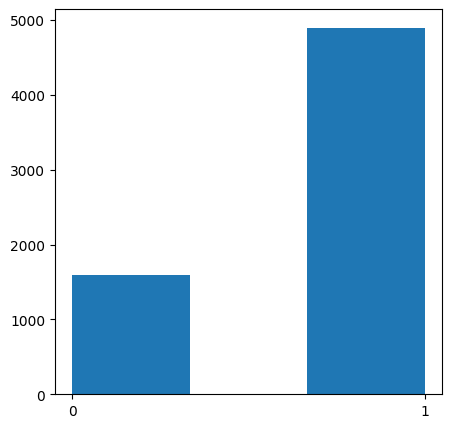

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.hist(wine['type'], bins=3)
plt.xticks([0, 1])
plt.show()

In [9]:
# 딥러닝학습을 위해 데이터를 훈련데이터와 테스트데이터로 나누기 전에 레드와인과 화이트와인이 비슷한 비율로 들어가도록
# 데이터를 한번 랜덤하게 섞어야 한다. 한 범주의 데이터 양이 매우 많거나 매우 적다면 섞기 전에 일정한 비율의 데이터가
# 훈련데이터와 테스트데이터에 모두 들어갈 수 있도록 다른 처리가 필요하겠지만 3:1 정도의 비율은 이러한 고려없이
# 랜덤하게 섞어도 거의 문제가 없다.
# 또한 데이터를 섞기 전에 데이터 정규화 작업도 반드시 해야 한다. 
# min, max를 이용해서 데이터 정규화를 하였다.

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.describe().round(4))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count      6497.0000         6497.0000    6497.0000       6497.0000   
mean          0.2823            0.1731       0.1919          0.0743   
std           0.1071            0.1098       0.0875          0.0730   
min           0.0000            0.0000       0.0000          0.0000   
25%           0.2149            0.1000       0.1506          0.0184   
50%           0.2645            0.1400       0.1867          0.0368   
75%           0.3223            0.2133       0.2349          0.1150   
max           1.0000            1.0000       1.0000          1.0000   

       chlorides  free sulfur dioxide  total sulfur dioxide    density  \
count  6497.0000            6497.0000             6497.0000  6497.0000   
mean      0.0781               0.1025                0.2529     0.1463   
std       0.0582               0.0616                0.1302     0.0578   
min       0.0000               0.0000                0.0000     

In [10]:
# 정규화된 데이터를 랜덤하게 섞고 학습을 위해 numpy array로 변경하자.
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

[[0.27272727 0.34       0.         0.02453988 0.11461794 0.08680556
  0.0875576  0.15635242 0.54263566 0.25842697 0.4057971  0.5
  0.        ]
 [0.10743802 0.22666667 0.0060241  0.01380368 0.01328904 0.08333333
  0.22119816 0.04414883 0.51162791 0.07865169 0.62318841 0.66666667
  1.        ]
 [0.33057851 0.29333333 0.15060241 0.01993865 0.11960133 0.04513889
  0.07373272 0.21765953 0.5503876  0.24157303 0.14492754 0.5
  0.        ]
 [0.26446281 0.12666667 0.44578313 0.0107362  0.27242525 0.11458333
  0.26497696 0.12010796 0.24806202 0.13483146 0.17391304 0.5
  1.        ]
 [0.21487603 0.2        0.15662651 0.11656442 0.05647841 0.09375
  0.21198157 0.100829   0.20930233 0.0505618  0.49275362 0.5
  1.        ]]


In [11]:
# 이제 훈련데이터와 테스트데이터로 나눠보자. 검증데이터는 훈련데이터에서 자동으로 만들 예정이다.
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

In [12]:
print(len(train_X), len(train_Y), len(test_X), len(test_Y))
print(train_X.shape, test_Y.shape)

5197 5197 1300 1300
(5197, 12) (1300,)


In [13]:
# tf.keras.utils.to_categorical은 분류문제에서 자주 사용되는 함수로, 정답행렬을 one-hot encoding방식으로 바꾼다.
# one-hot encoding은 정답에 해당하는 인덱스의 값에는 1을 넣고, 나머지 인덱스에는 모두 0을 넣는 방식이다.
# to_categorical의 두번째 인수인 num_classes는 정답클래스의 개수이다. 지금은 red, white 두종류이니까 2이다.
# 이렇게 정답의 인코딩 방식을 바꾼 결과 0.0은 [1, 0]으로 1.0은 [0, 1]로 바뀐 것을 알 수 있다.

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0], test_Y[0])

[1. 0.] [0. 1.]


In [17]:
# 이제 딥러닝 학습을 해보자. 모델구조에 대한 특별한 이슈가 없기 때문에 Sequential모델을 계속 사용한다.
# 분류모델이기 때문에 마지막 레이어의 activaion fcn으로 softmax를 사용했다.
# 분류에서 가장 많이 사용하는 이 함수는 출력값들을 자연로그의 밑인 e의 지수로 사용해 계산한 뒤 모두 더한값으로 나눈다.
# 마지막 레이어에서 더 주목해서 볼 점은 뉴런의 개수가 2로 설정돼 있다는 것이다. 위에서 원-핫 인코딩으로 변환한
# 정답의 차원 수와 동일한 값이다.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12, )),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), 
              loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 48)                624       
                                                                 
 dense_5 (Dense)             (None, 24)                1176      
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


##### 소프트맥스 함수는<br>$$P(z_j) = {\frac{e^{z_j}}{\sum_{k=1}^K{e^{z_k}}}(for~j = 1,2,...,K)}$$

##### 예를 들어 [2, 1, 0]이라는 값이 있을 경우, 소프트맥스로 변환한다면<br>
##### $$sum = {\sum_{k=1}^K{e^{z_k}}~=~{e^2}~+~{e^1}~+~{e^0}~=~11.1073}$$<br>
##### $$softmax = {\frac{e^{z_j}}{\sum_{k=1}^K{e^{z_k}}}~=~{[{\frac{e^2}{sum}{,}~~\frac{e^1}{sum}{,}~~\frac{e^0}{sum}}]}~=~{[0.67,~0.24,~0.09]}}$$

In [15]:
# 즉 [0.67, 0.24, 0.09]라는 확률값이 된다.
# 소프트맥스라는 단어는 max함수와 비슷한 의미로 max함수의 약화된 버전이라고 생각할 수 있다. [2,1,0]에 max함수를 
# 취하면 [2,0,0]이 될텐데 소프트맥스는 이보다는 좀 더 약하지만 max함수와 비슷하게 큰 값을 강조하고 작은 값은 
# 약화하는 효과를 갖는다. e를 밑으로 하는 지수함수를 취하기 때문에 위의 효과가 발생하며 0이나 음수에도 적용가능하다.
# 소프트맥스는 분류문제나 언어 RNN에서의 다음 token예측, 강화학습에서 에이전트의 행동확률을 구하는 등 결과값으로
# 확률이 필요한 다양한 분야에서 쓰인다.

##### 엔트로피(entropy)와 정보이론<br><br>정보이론에서는 정보량을 나타내기 위해 엔트로피라는 단위를 사용한다. 물리에서 쓰이는 엔트로피처럼 정보이론의 엔트로피도 불확실한 정보를 숫자로 정량화하려는 노력이자 도구이다.<br>간단히 말하면 엔트로피는 확률의 역수에 로그를 취한 값이다. 어떤 사건 X가 일어날 확률을 p(x), 엔트로피를 h(x)라고 할 때 $$h(x)~=~{\log{\frac{1}{p(x)}}}~=~{-\log{p(x)}}$$확률의 역수를 취해주는 이유는 확률이 높은 사건일수록 정보량(놀라움)이 적다고 규정하기 때문이다. 만약 내일 비가 올 확률이 1%일 때 비가 오지 않을 확률은 99%일 것이다. 이때 각 사건의 정보량은$$h(비)~=~{-\log0.01}~=~4.605$$ $$h(비가 오지 않음)~=~{-\log0.99}~=~0.010$$비가 오지 않는 경우는 비가 오는 경우보다 약 460배 정도 더 놀라운 사건이 된다.<br>엔트로피의 기댓값은 각 엔트로피에 확률을 곱해준 값이다.$$E(X)~=~{-p(x){\log{p(x)}}}$$위의 비 사건의 엔트로피를 계산해보면 0.0461, 비가 오지 않을 사건의 엔트로피는 0.0099로 비가 오는 사건의 엔트로피가 높은 것을 확인할 수 있다. 이렇게 엔트로피가 더 높은 사건을 정보 획득 측면에서 더 가치 있는 사건으로 분류할 수 있다. 이 경우 엔트로피의 양만큼 비가 올 확률에 대한 예측값을 조정해서 결과적으로 다음에 얻을 엔트로피를 낮추려고 노력하는 것이다. 높은 엔트로피는 높은 불확실성을 의미하기 때문에 엔트로피를 줄이면 불확실성이 낮아지고 의미 있는 정보를 얻을 수 있게 된다.

In [18]:
# 이제 분류 네트워크를 학습시켜보자.
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 6ms/step - loss: 0.1166 - accuracy: 0.9528 - val_loss: 0.0908 - val_accuracy: 0.9654
Epoch 2/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0263 - val_accuracy: 0.9954
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9864 - val_loss: 0.0505 - val_accuracy: 0.9815
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9836 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9869 - val_loss: 0.0269 - val_accuracy: 0.9923
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9872 - val_loss: 0.0269 - val_accuracy: 0.9938
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9890 - val_loss: 0.0433 - val_accuracy: 0.9885
Epoch 

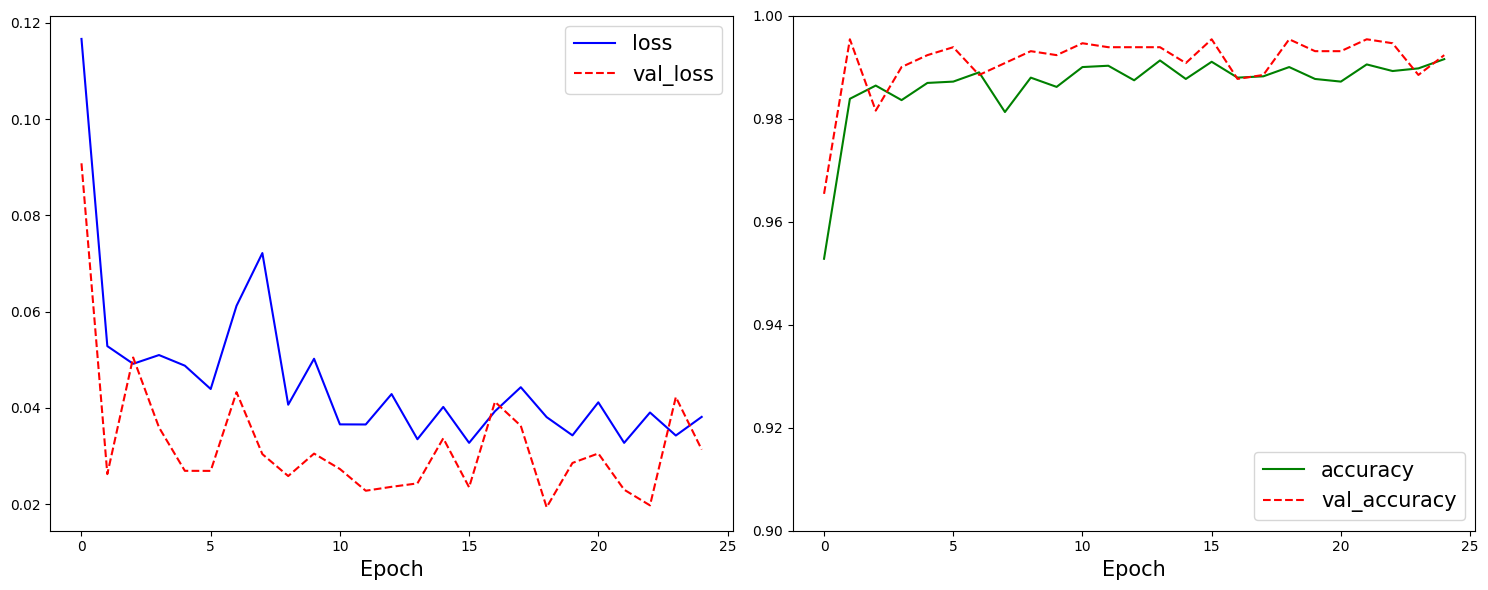

In [30]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch', size=15)
plt.legend(loc='upper right', fontsize=15)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch', size=15)
plt.ylim(0.9, 1)
plt.legend(loc='lower right', fontsize=15)

plt.tight_layout()
plt.show()